# Tema 4: Regresión y Evaluación de algoritmos de regresión

**¿Cómo de bueno es un modelo de regresión?**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# cargar el dataset 
car_df = pd.read_csv('CarPrice.csv')

In [3]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
categorical_feature = car_df.dtypes==object
final_categorical_feature = car_df.columns[categorical_feature].tolist()

numeric_feature = car_df.dtypes!=object
final_numeric_feature = car_df.columns[numeric_feature].tolist()

In [5]:
Company = car_df['CarName'].apply(lambda x : x.split()[0])
Company

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [6]:
car_df.insert(1, 'Company', Company)
car_df.drop(['CarName'], axis=1, inplace=True)
car_df.head()

,car_ID,Company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
car_df['Company'].replace('alfa-romero', 'alfa-romeo', inplace=True)
car_df['Company'].replace('maxda', 'mazda', inplace=True)
car_df['Company'].replace('porcshce', 'porsche', inplace=True)
car_df['Company'].replace('toyouta', 'toyota', inplace=True)
car_df['Company'].replace('vokswagen', 'volkswagen', inplace=True)
car_df['Company'].replace('vw', 'volkswagen', inplace=True)
car_df['Company'].unique()

/var/folders/hk/hc_3jxjx6l3_q31yrc71m_sw0000gn/T/ipykernel_5581/3630266040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_df['Company'].replace('alfa-romero', 'alfa-romeo', inplace=True)
/var/folders/hk/hc_3jxjx6l3_q31yrc71m_sw0000gn/T/ipykernel_5581/3630266040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
final_categorical_feature.append('Company')
final_categorical_feature.remove('CarName')
final_categorical_feature

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company']

In [9]:
# transformamos categorías a One Hot Encoding
df_dummy = pd.get_dummies(car_df, prefix=final_categorical_feature, columns=final_categorical_feature, drop_first=True)
df_dummy.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,False,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False


In [10]:
from sklearn.model_selection import train_test_split

car_df_x = car_df.drop(columns=['price'])

In [11]:
car_df_x = car_df_x.select_dtypes(include=np.number)

In [12]:
car_df_y = car_df['price']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(car_df_x, car_df_y, test_size=0.20, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler


# scale the target variable
scale_target = MinMaxScaler()
y_train = pd.DataFrame(y_train)
y_train = scale_target.fit_transform(y_train)
y_test = pd.DataFrame(y_test)
y_test = scale_target.transform(y_test)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

regression_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression())
])
regression_pipeline.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None


In [16]:
# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
car_y_pred = regression_pipeline.predict(X_test)

## Analizamos el error

- MSE, mean squared error
- R2, coeficiente de determinación

In [17]:
# MSE, mean squared error
print("Mean squared error: %.5f" % mean_squared_error(y_test, car_y_pred))
# R2 - recordemos que 1 es la predicció perfecta
print("R2: %.5f" % r2_score(y_test, car_y_pred))

test_mse_Ridge = mean_squared_error(y_test, car_y_pred)
test_r2_Ridge = r2_score(y_test, car_y_pred)

Mean squared error: 0.00722
R2: 0.85167


**MSE**: media de la diferencia entre el valor real y el valor predicho o estimado al cuadrado. El error cuadrático medio (MSE) se calcula elevando al cuadrado los residuos y sumándolos.

Algunas características importantes del MSE son:

- Penalización cuadrática: El MSE calcula el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales. Esto significa que los errores más grandes tienen un impacto más significativo en el MSE que los errores más pequeños. Por lo tanto, el MSE es más sensible a los errores grandes que otras métricas.
- Interpretación en la misma escala: El MSE se mide en las mismas unidades cuadradas que la variable objetivo, lo que puede dificultar su interpretación direct
- Propenso a valores atípicos: Debido a la naturaleza cuadrática de la métrica, el MSE es más sensible a los valores atípicos o a las diferencias extremas entre las predicciones y los valores reales. Esto puede hacer que el MSE sea menos robusto en presencia de valores atípicos que otras métric
- Optimización matemática: Muchos algoritmos de optimización están diseñados para minimizar el MSE durante el entrenamiento de modelos de regresión, lo que hace que el MSE sea una opción popular como función de pérdida en el proceso de entrenamien

**R2**: la proporción de la información de los datos que explica el modelo.

En este caso indica que, lo que indica que alrededor del 85% de la varianza en la variable objetivo es explicada por el modelo. Los valores más altos de R2 sugieren un mejor ajuste del modelo a los datos.to.


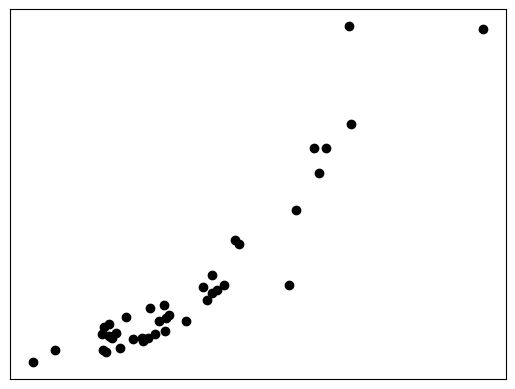

In [18]:
# Plot
plt.scatter(car_y_pred, y_test, color="black")

plt.xticks(())
plt.yticks(())

plt.show()

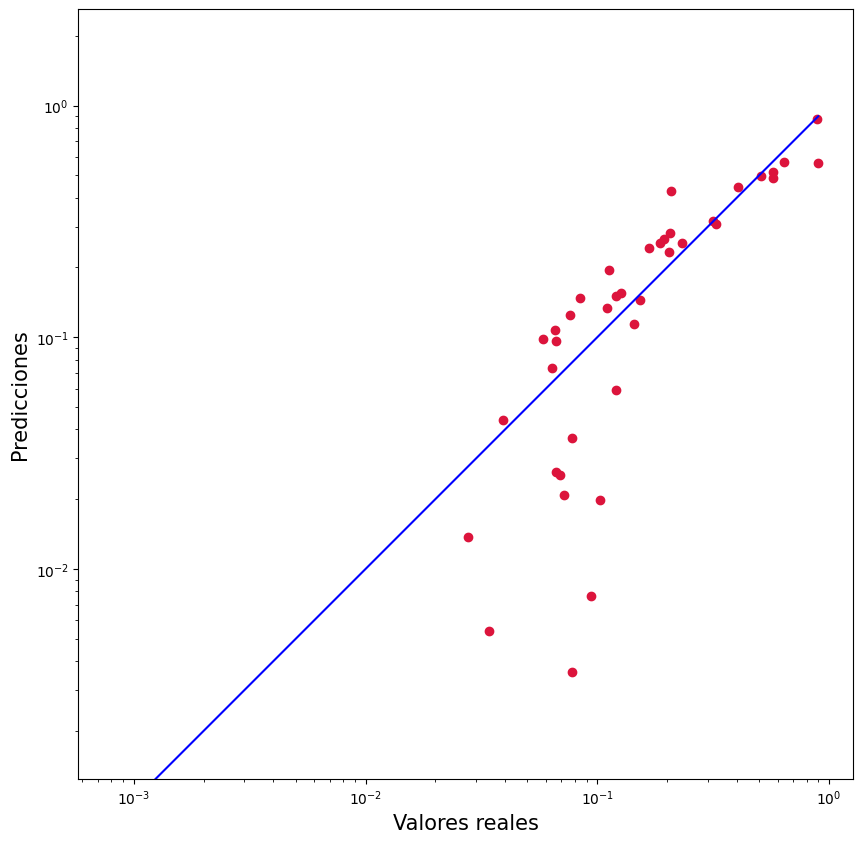

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, car_y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(car_y_pred), max(y_test))
p2 = min(min(car_y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Valores reales', fontsize=15)
plt.ylabel('Predicciones', fontsize=15)
plt.axis('equal')
#plt.show()
plt.savefig('fig2.jpg')

In [20]:
y_train_pred = regression_pipeline.predict(X_train)
train_mse_Ridge = mean_squared_error(y_train, y_train_pred)
train_r2_Ridge = r2_score(y_train, y_train_pred)

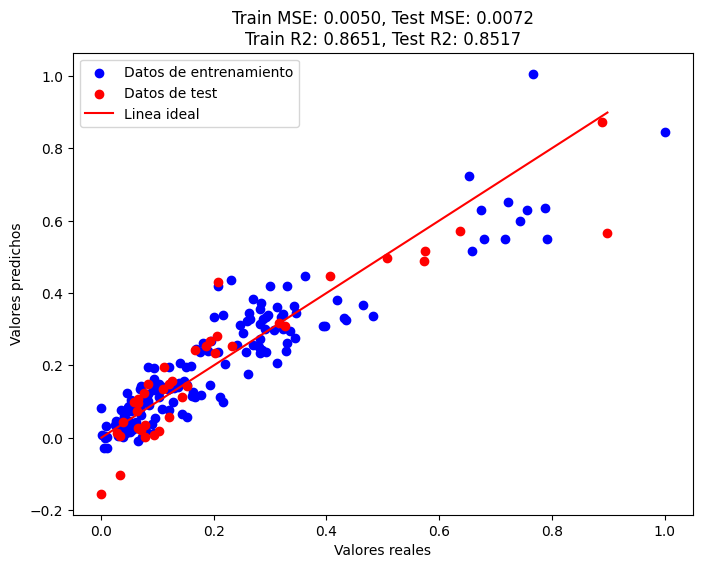

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(y_train, y_train_pred, color='blue', label='Datos de entrenamiento')
ax.scatter(y_test, car_y_pred, color='red', label='Datos de test')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Linea ideal')

ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predichos')
ax.set_title(f'Train MSE: {train_mse_Ridge:.4f}, Test MSE: {test_mse_Ridge:.4f}\nTrain R2: {train_r2_Ridge:.4f}, Test R2: {test_r2_Ridge:.4f}')
ax.legend()

# Plotting
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
# MAE
mae = mean_absolute_error(y_test, car_y_pred)
print("Mean absolute error: %.5f" % mae)

# RMSE
print("Root Mean squared error: %.5f" % np.sqrt(mean_squared_error(y_test, car_y_pred)))

# RMSLE
rmsle = mean_squared_log_error(y_test, car_y_pred)
print("Mean squared log error: %.5f" % rmsle)

Mean absolute error: 0.05986
Root Mean squared error: 0.08495
Mean squared log error: 0.00445
